<a href="https://colab.research.google.com/github/gantapriyanka1325/DeepLearningLab/blob/main/program7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7 Design and implement LSTM model with tensor flow / keras and check accuracy.



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [ ]:
# 1) Load dataset
df = pd.read_csv("/content/netflix_titles.csv")   # your dataset
df = df[['type', 'description']].dropna()

# Convert labels (Movie / TV Show) → numbers
le = LabelEncoder()
df['label'] = le.fit_transform(df['type'])

texts = df['description'].values
labels = df['label'].values



In [ ]:
# 2) Tokenization + Padding
max_words = 5000        # only keep top 5000 words
max_len = 150           # cut or pad all descriptions to length 150

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')


In [ ]:
# 3) Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,
    labels,
    test_size=0.2,
    random_state=42
)


In [ ]:
# 4) Build LSTM Model

model = models.Sequential([
    layers.Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    layers.LSTM(64, return_sequences=False),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 5) Train the model

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    verbose=1
)


Epoch 1/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 23s 106ms/step - accuracy: 0.6878 - loss: 0.6267 - val_accuracy: 0.6948 - val_loss: 0.6164
Epoch 2/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - accuracy: 0.6989 - loss: 0.6137 - val_accuracy: 0.6948 - val_loss: 0.6158
Epoch 3/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - accuracy: 0.7009 - loss: 0.6109 - val_accuracy: 0.6948 - val_loss: 0.6158
Epoch 4/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - accuracy: 0.6950 - loss: 0.6171 - val_accuracy: 0.6948 - val_loss: 0.6152
Epoch 5/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - accuracy: 0.7043 - loss: 0.6078 - val_accuracy: 0.6948 - val_loss: 0.6152


In [ ]:
# 6) Evaluate Accuracy

loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc:.4f}")
print(f"Test Loss: {loss:.4f}")


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6691 - loss: 0.6363

Test Accuracy: 0.6890
Test Loss: 0.6200


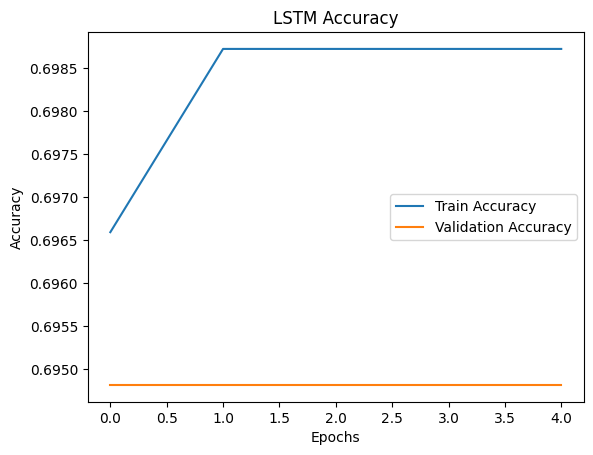

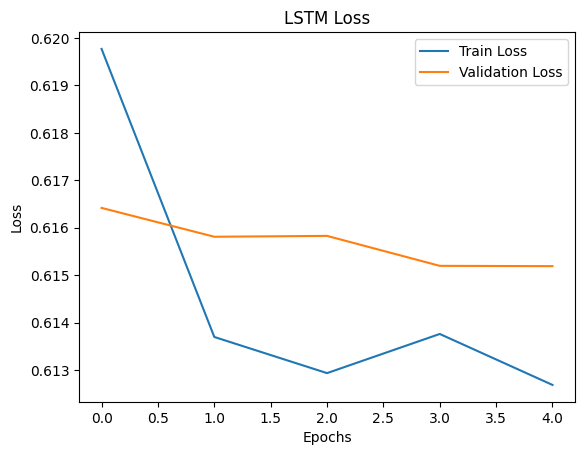

In [ ]:
# 7) Plot Loss & Accuracy Graphs
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LSTM Accuracy")
plt.legend()
plt.show()

# Loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM Loss")
plt.legend()
plt.show()



In [ ]:
# 8) Predict new text

sample = ["Two teenage friends discover a dark secret in their neighborhood."]
seq = tokenizer.texts_to_sequences(sample)
pad = pad_sequences(seq, maxlen=max_len, padding='post')

pred = model.predict(pad)[0][0]

print("\nPrediction:")
print("TV Show" if pred > 0.5 else "Movie")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Prediction:
Movie
